In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/code-to-start/__results__.html
/kaggle/input/code-to-start/__resultx__.html
/kaggle/input/code-to-start/__notebook__.ipynb
/kaggle/input/code-to-start/__output__.json
/kaggle/input/code-to-start/custom.css
/kaggle/input/code-to-start/__results___files/__results___18_1.png
/kaggle/input/code-to-start/__results___files/__results___62_1.png
/kaggle/input/code-to-start/__results___files/__results___15_1.png
/kaggle/input/code-to-start/__results___files/__results___32_1.png
/kaggle/input/code-to-start/__results___files/__results___21_1.png
/kaggle/input/mental-stress-ppg/data.csv


In [ ]:
%%capture
## !pip install antropy -q

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import statistics as st
# from antropy import *


In [4]:
df = pd.read_csv('../input//mental-stress-ppg/data.csv')
df.head()

,subject ID,labels,0,1,2,3,4,5,6,7,...,672,673,674,675,676,677,678,679,680,681
0,sub_1,normal,640.0,636.0,630.0,656.0,670.0,644.0,660.0,608.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sub_2,normal,656.0,640.0,648.0,622.0,628.0,644.0,648.0,698.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub_3,normal,572.0,564.0,550.0,526.0,524.0,510.0,502.0,496.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sub_4,normal,298.0,538.0,322.0,532.0,874.0,850.0,824.0,854.0,...,806.0,812.0,814.0,790.0,740.0,716.0,724.0,720.0,710.0,708.0
4,sub_5,normal,630.0,616.0,598.0,638.0,626.0,616.0,594.0,620.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Separate data and labels. First column corresponds to labels.

In [5]:
data = df.iloc[:,2::].T
labels=df.iloc[:,1].T

# pandas.DataFrame.T property is used to transpose index and columns of the data
# frame. Main function of this property is to create a reflection of the data frame over the main diagonal by 
# making rows as columns and vice versa.

Print first and last 5 rows of data and labels

In [6]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,640.0,656.0,572.0,298.0,630.0,618.0,632.0,330.0,426.0,662.0,...,658.0,580.0,256.0,630.0,614.0,716.0,740.0,660.0,748.0,850.0
1,636.0,640.0,564.0,538.0,616.0,638.0,670.0,624.0,774.0,668.0,...,694.0,566.0,502.0,622.0,570.0,738.0,784.0,640.0,728.0,796.0
2,630.0,648.0,550.0,322.0,598.0,2030.0,724.0,740.0,748.0,742.0,...,636.0,576.0,302.0,602.0,566.0,724.0,798.0,662.0,744.0,816.0
3,656.0,622.0,526.0,532.0,638.0,1330.0,700.0,772.0,666.0,760.0,...,600.0,598.0,504.0,586.0,618.0,682.0,806.0,676.0,762.0,846.0
4,670.0,628.0,524.0,874.0,626.0,1432.0,740.0,690.0,664.0,732.0,...,628.0,624.0,302.0,594.0,630.0,674.0,816.0,660.0,714.0,804.0


In [7]:
labels.head()

0    normal
1    normal
2    normal
3    normal
4    normal
Name: labels, dtype: object

Remove columns with any missing values
use pandas dropna 

In [8]:
data.dropna(how='any' , inplace=True , axis=0)

In [9]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,640.0,656.0,572.0,298.0,630.0,618.0,632.0,330.0,426.0,662.0,...,658.0,580.0,256.0,630.0,614.0,716.0,740.0,660.0,748.0,850.0
1,636.0,640.0,564.0,538.0,616.0,638.0,670.0,624.0,774.0,668.0,...,694.0,566.0,502.0,622.0,570.0,738.0,784.0,640.0,728.0,796.0
2,630.0,648.0,550.0,322.0,598.0,2030.0,724.0,740.0,748.0,742.0,...,636.0,576.0,302.0,602.0,566.0,724.0,798.0,662.0,744.0,816.0
3,656.0,622.0,526.0,532.0,638.0,1330.0,700.0,772.0,666.0,760.0,...,600.0,598.0,504.0,586.0,618.0,682.0,806.0,676.0,762.0,846.0
4,670.0,628.0,524.0,874.0,626.0,1432.0,740.0,690.0,664.0,732.0,...,628.0,624.0,302.0,594.0,630.0,674.0,816.0,660.0,714.0,804.0


In [10]:
data.shape

(337, 54)

Plot the data

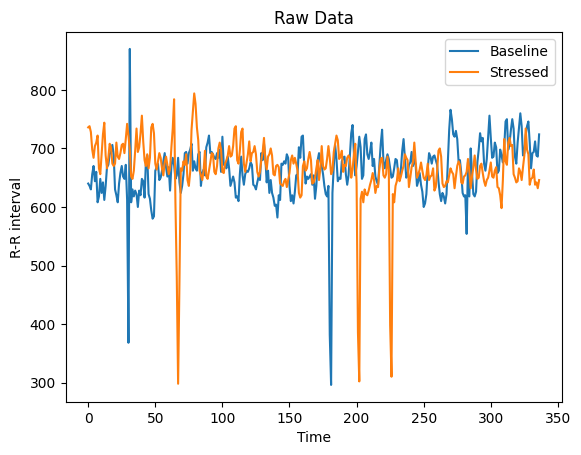

In [12]:
plt.plot(data.iloc[:,0:1].values,label='Baseline')
plt.plot(data.iloc[:,27:28].values,label='Stressed')
plt.xlabel('Time')
plt.ylabel('R-R interval')
plt.title('Raw Data')
plt.legend()

Remove Outlier

Remove outliers such as values greater than 1000 or lower than 600 (Method used)

Other methods that can be explored:
interquartile range

In [13]:
# data = np.where((data.values>1000) | (data.values<600),np.median(data.values), data.values)

data=np.where((data.values > 1000) | (data.values<600), np.median(data.values), data.values)

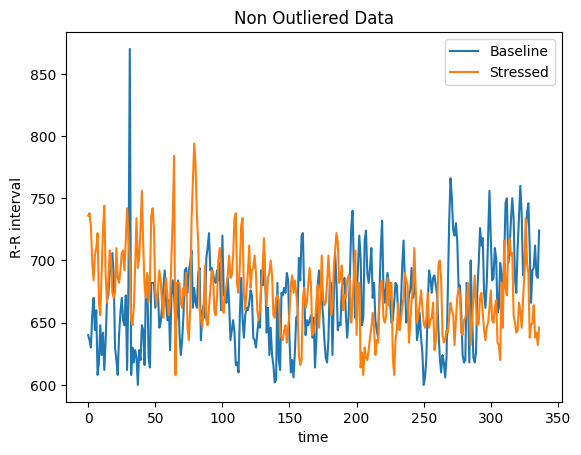

In [14]:
plt.plot(data[:,0:1], label='Baseline')
plt.plot(data[:,27:28], label='Stressed')
plt.xlabel('time')
plt.ylabel('R-R interval')
plt.title('Non Outliered Data')
plt.legend()

# Apply filter to the data 


Apply any smoothening filter such as Savitzky-Golay filter or moving filter 

In [15]:
from scipy.signal import savgol_filter
data = savgol_filter(data,5,3)

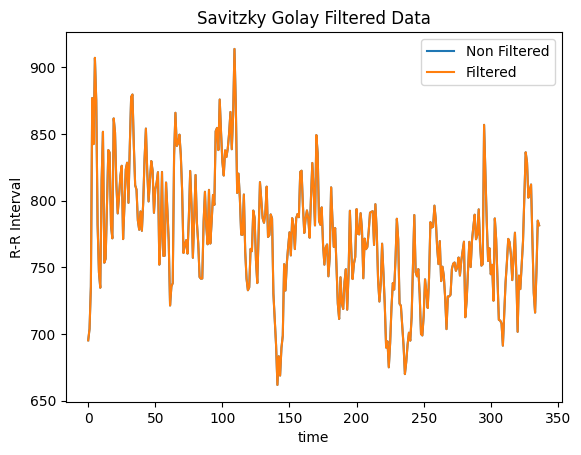

In [16]:
plt.plot(data[:,10:11],label='Non Filtered')
plt.plot(data[:,10:11],label='Filtered')
plt.xlabel('time')
plt.ylabel('R-R Interval')
plt.title('Savitzky Golay Filtered Data')
plt.legend()

# Calculate Features

Calculate Following features:

1. mean
2. median
3. maximum
4. variance
5. standard deviation
6. maximum
7. minimum

Time Domain Features:

8. ranges
9. rmssd : root mean square of successive differences
10. sdsd : standard deviation of successive differences
11. nni_50 : number of normal-to-normal intervals greater than 50ms
12. pnni_50 : proportion of normal-to-normal intervals > 50ms
13. nni_20 : number of normal-to-normal intervals greater than 20ms. Count of successive heartbeats where time difference exceeds 20ms 
14. pnni_20 : proportion of normal-to-normal intervals greater than 20ms 
15. avg_hr
16. std_hr
17. min_hr
18. max_hr
19. energy
20. abs_sum_diff


In [17]:
def ranges(x):
    return x.max() - x.min()

def rmssd(x):
    return np.sqrt(np.mean(np.diff(x)**2))

def sdsd(x):
    return st.stdev(np.diff(x))

def nni_50(x):
    return sum(np.abs(np.diff(x)) > 50)

def pnni_50(x):
    return 100* nni_50(x) / len(x)

def nni_20(x):
    return sum(np.abs(np.diff(x)) >20)

def pnni_20(x):
    return 100 * nni_20(x) / len(x)

def avg_hr(x):
    return st.mean(60000/x)

def std_hr(x):
    return st.stdev(60000/x)

def min_hr(x):
    return min(60000/x)

def max_hr(x):
    return max(60000/x)

def energy(x):
    return sum(np.square(x))

def abs_sum_diff(x):
    # sum of absolute differences (SAD) is a measure of the similarity between signal
    return sum(np.abs(np.diff(x)))

In [18]:
data = pd.DataFrame(data)

# agg() method allows you to apply a function or a list of function names 
# to be executed along one of the axis of the DataFrame, default 0, which is the index (row) axis 

# time_features=data.agg([np.mean,np.var, np.median,np.max,np.min,ranges,rmssd,
#                        sdsd,nni_50,pnni_50,nni_20,pnni_20,avg_hr,std_hr,
#                        min_hr, max_hr,energy,abs_sum_diff,],axis=0)


# errors encountered due to use of callable functions like np.var, np.median, np.max, and np.min in pandas.agg()
# n future versions of pandas, these callables will be treated differently,
# and pandas suggests using their corresponding string equivalents (e.g., "var", "median", "max", "min") instead to ensure compatibility.

time_features=data.agg(['mean', 'var', 'median', 'max', 'min',ranges,rmssd,
                       sdsd,nni_50,pnni_50,nni_20,pnni_20,avg_hr,std_hr,
                       min_hr, max_hr,energy,abs_sum_diff,],axis=0)

In [19]:
time_features.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
mean,676.403985,646.241628,717.029250,715.338364,720.281136,691.442476,756.752692,735.307673,717.297160,713.963205,...,666.037134,711.997626,707.617465,686.592794,666.277575,726.617550,723.719033,687.560322,681.282238,807.094871
var,1266.766605,1100.708799,595.708688,547.531022,912.999250,2014.501827,3193.235705,2753.972463,2391.441620,2065.388331,...,969.133845,844.553989,874.253173,648.804984,639.147028,862.646185,643.497606,633.434048,1745.344947,898.146038
median,678.257143,645.428571,717.142857,717.142857,719.200000,684.628571,748.457143,729.828571,710.171429,706.114286,...,662.057143,714.228571,710.000000,687.885714,668.628571,727.771429,724.514286,687.828571,679.371429,805.971429
max,869.200000,760.457143,788.114286,775.657143,808.457143,860.742857,984.000000,929.257143,928.342857,844.628571,...,747.942857,799.428571,790.000000,755.200000,730.000000,808.285714,812.000000,771.085714,782.742857,897.485714
min,607.685714,574.628571,636.114286,642.685714,635.885714,594.914286,633.714286,628.057143,620.800000,618.171429,...,580.000000,638.000000,630.571429,622.628571,598.571429,631.314286,655.657143,607.771429,591.314286,709.514286


# Frequency Features 

In [20]:
# pip install --upgrade scipy

^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [22]:
from scipy import signal 
from scipy.ndimage import label
from scipy.stats import zscore
from scipy.interpolate import interp1d
from scipy import integrate
from scipy.integrate import *  # this will include trapz. BUT using a wildcard import is not recommended as 
# it imports all functions and variables from the scipy.integrate module which can cause namespace pollution, conflicts btw similarly
# named functions in different libraries

# from scipy.integrate import trapz
# from scipy import trapz

from numpy import trapz # ORIGINALLY USED FROM SCIPY.INTEGRATE IMPORT TRAPZ WHICH DID NOT WORK

In [23]:
data.shape,len(data)

((337, 54), 337)

# Interpolate R-R: 



Convert unevenly spaced data into a uniformly sampled time series
**R-R intervals** in heart rate variability analysis represent the time between successive heartbeats. These intervals are **irregular** as the 
heart rate varies slightly with each beat. 

Most signal processing techniques especially frequency domain analysis (like FFT or Welch's method), require uniformly spaced data (i.e a constant sampling rate)

* To apply methods like Fast Fourier Transform (FFT) or Welch’s method, which are critical for frequency-domain HRV analysis (such as identifying LF, HF, VLF power), 
the data needs to be resampled at a consistent rate. Interpolation allows you to convert the irregular R-R intervals into a regularly sampled signal.

* Improving Resolution for Time-Domain Analysis:

    In time-domain HRV analysis, uniformly spaced data ensures better calculation of features like the Root Mean Square of Successive Differences (RMSSD), Standard Deviation of Normal-to-Normal Intervals (SDNN), and other time-based metrics. Having evenly spaced points makes these calculations more reliable.

* Smoothing the Data (via Cubic Interpolation):

    The cubic interpolation method used in this code not only resamples the data but also smooths it by fitting a cubic curve between data points. This helps reduce noise and capture the physiological trends more effectively.
    
* Sampling at a Desired Frequency (fs=4 Hz):

    After interpolation, the data is resampled at a new frequency (fs = 4 Hz), meaning the new signal will have a regular interval between samples (1/4 seconds or 250 ms). This allows for further analysis using standard techniques that expect regularly sampled signals.

In [24]:
rr_interpolated=[]
for i in range(len(data)):
    rr_manual = data.T[i]
    x= np.cumsum(rr_manual)/1000.0 # cumulative sum of data
    f = interp1d(x, rr_manual , kind='cubic',fill_value="extrapolate") # extrapolation
    fs = 4.0 # new sampling frequency 
    steps = 1/fs
    
    # now we can sample from interpolation function
    xx=np.arange(1, np.max(x),steps)
    rr_interpolated.append(f(xx))
    
#  why interpolate R-R: Convert unevenly spaced data into a uniformly sampled time series
# R-R intervals in heart rate variability analysis represent the time between successive heartbeats. These intervals are irregular as the 
# heart rate varies slightly with each beat. 

# most signal processing techniques especially frequency domain analysis (like FFT or Welch's method), require uniformly spaced data (i.e a constant sampling rate)

# To apply methods like Fast Fourier Transform (FFT) or Welch’s method, which are critical for frequency-domain HRV analysis (such as identifying LF, HF, VLF power), 
# the data needs to be resampled at a consistent rate. Interpolation allows you to convert the irregular R-R intervals into a regularly sampled signal.

# Improving Resolution for Time-Domain Analysis:

# In time-domain HRV analysis, uniformly spaced data ensures better calculation of features like the Root Mean Square of Successive Differences (RMSSD), Standard Deviation of Normal-to-Normal Intervals (SDNN), and other time-based metrics. Having evenly spaced points makes these calculations more reliable.

In [25]:
len(rr_interpolated), rr_interpolated[0].shape , rr_interpolated[27].shape,data.shape

(337, (146,), (149,), (337, 54))

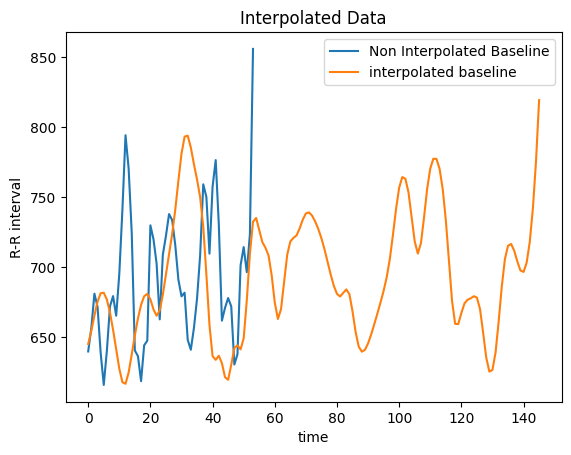

In [26]:
plt.plot(data.iloc[0],label='Non Interpolated Baseline')
plt.plot(rr_interpolated[0],label='interpolated baseline')
plt.xlabel('time')
plt.ylabel('R-R interval')
plt.title('Interpolated Data')
plt.legend()

In [28]:
def frequency_domain(rri , fs=4):
    # Estimate the spectral density using Welch's method 
    fxx , pxx = signal.welch(x=rri , fs=fs)
    
    '''
    Segement found frequencies in the bands 
     - Very Low Frequency (VLF): 0-0.04Hz 
     - Low Frequency (LF): 0.04-0.15Hz 
     - High Frequency (HF): 0.15-0.4Hz
    '''
    
    cond_vlf = (fxx >= 0) & (fxx < 0.04)
    cond_lf = (fxx >= 0.04) & (fxx < 0.15)
    cond_hf = (fxx >= 0.15) & (fxx < 0.4)
    
    # calculate power in each band by integrating the spectral density 
    
    vlf = trapz(pxx[cond_vlf] , fxx[cond_vlf])
    lf= trapz(pxx[cond_vlf] , fxx[cond_lf])
    hf = trapz(pxx[cond_hf] , fxx[cond_hf])
    
    # sum these up to get total power
    total_power = vlf + lf + hf
    
    # find which frequency has the most power in each band
    peak_vlf = fxx[cond_vlf][np.argmax(pxx[cond_vlf])]
    peak_lf = fxx[cond_lf][np.argmax(pxx[cond_lf])]
    peak_hf = fxx[cond_hf][np.argmax(pxx[cond_hf])]
    
    # fraction of lf and hf
    lf_nu = 100 * lf / (lf+hf)
    hf_nu = 100* hf/(lf+hf)
    result = [vlf, lf,hf,total_power, lf/hf,peak_vlf,peak_lf, peak_hf,lf_nu,hf_nu ]
    return np.array(result),fxx,pxx

In [29]:
x=rr_interpolated[0]

In [30]:
freq_feat=[]
for i in range(len(data.T)):
    results, fxx,pxx = frequency_domain(rr_interpolated[i])
    freq_feat.append(results)

/opt/conda/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 146, using nperseg = 146
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/opt/conda/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 149, using nperseg = 149
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/opt/conda/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 148, using nperseg = 148
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/opt/conda/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 151, using nperseg = 151
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/opt/conda/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:600: UserWa

In [31]:
np.array(freq_feat).shape

(54, 10)

In [32]:
freq_col=['vlf','lf','hf','tot_pow','lf_hf_ratio','peak_vlf','peak_lf','peak_hf','lf_nu','hf_nu']
freq_features=pd.DataFrame(freq_feat,columns=freq_col)
freq_features.head()

,vlf,lf,hf,tot_pow,lf_hf_ratio,peak_vlf,peak_lf,peak_hf,lf_nu,hf_nu
0,12.642281,37.926842,479.137346,529.706469,0.079157,0.027397,0.109589,0.191781,7.335036,92.664964
1,35.429426,106.288278,1098.280160,1239.997864,0.096777,0.026846,0.107383,0.241611,8.823764,91.176236
2,38.128145,114.384435,956.533677,1109.046257,0.119582,0.026846,0.107383,0.241611,10.680969,89.319031
3,158.514759,475.544276,728.255045,1362.314080,0.652991,0.027027,0.108108,0.297297,39.503617,60.496383
4,105.833507,317.500520,723.344420,1146.678446,0.438934,0.026846,0.053691,0.322148,30.504113,69.495887


In [33]:
features = pd.concat([time_features.T, freq_features],axis=1)
features.head()

,mean,var,median,max,min,ranges,rmssd,sdsd,nni_50,pnni_50,...,vlf,lf,hf,tot_pow,lf_hf_ratio,peak_vlf,peak_lf,peak_hf,lf_nu,hf_nu
0,676.403985,1266.766605,678.257143,869.200000,607.685714,261.514286,31.752056,31.798301,25.0,7.418398,...,12.642281,37.926842,479.137346,529.706469,0.079157,0.027397,0.109589,0.191781,7.335036,92.664964
1,646.241628,1100.708799,645.428571,760.457143,574.628571,185.828571,25.236825,25.274390,14.0,4.154303,...,35.429426,106.288278,1098.280160,1239.997864,0.096777,0.026846,0.107383,0.241611,8.823764,91.176236
2,717.029250,595.708688,717.142857,788.114286,636.114286,152.000000,17.854805,17.881197,5.0,1.483680,...,38.128145,114.384435,956.533677,1109.046257,0.119582,0.026846,0.107383,0.241611,10.680969,89.319031
3,715.338364,547.531022,717.142857,775.657143,642.685714,132.971429,20.352727,20.382754,7.0,2.077151,...,158.514759,475.544276,728.255045,1362.314080,0.652991,0.027027,0.108108,0.297297,39.503617,60.496383
4,720.281136,912.999250,719.200000,808.457143,635.885714,172.571429,30.281842,30.326387,30.0,8.902077,...,105.833507,317.500520,723.344420,1146.678446,0.438934,0.026846,0.053691,0.322148,30.504113,69.495887


In [34]:
features.columns

Index(['mean', 'var', 'median', 'max', 'min', 'ranges', 'rmssd', 'sdsd',
       'nni_50', 'pnni_50', 'nni_20', 'pnni_20', 'avg_hr', 'std_hr', 'min_hr',
       'max_hr', 'energy', 'abs_sum_diff', 'vlf', 'lf', 'hf', 'tot_pow',
       'lf_hf_ratio', 'peak_vlf', 'peak_lf', 'peak_hf', 'lf_nu', 'hf_nu'],
      dtype='object')

# Clustering k=3 

In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming your dataframe is named 'features'
# 1. Load and inspect the data
print(features.columns)

# 2. Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 3. Apply k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)  # Set a random state for reproducibility
features['cluster'] = kmeans.fit_predict(features_scaled)

# 4. Analyze the clustering results
# Cluster centers (mean feature values for each cluster)
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features.columns[:-1])
print("Cluster Centers:")
print(cluster_centers)

# 5. Visualize or check cluster assignments
print(features['cluster'].value_counts())

# Optional: Inspect the first few rows with cluster assignments
print(features.head())


Index(['mean', 'var', 'median', 'max', 'min', 'ranges', 'rmssd', 'sdsd',
       'nni_50', 'pnni_50', 'nni_20', 'pnni_20', 'avg_hr', 'std_hr', 'min_hr',
       'max_hr', 'energy', 'abs_sum_diff', 'vlf', 'lf', 'hf', 'tot_pow',
       'lf_hf_ratio', 'peak_vlf', 'peak_lf', 'peak_hf', 'lf_nu', 'hf_nu'],
      dtype='object')
Cluster Centers:
         mean          var      median         max         min      ranges  \
0  681.234666   866.200613  680.836264  769.465934  607.904396  161.561538   
1  739.566935  1179.500475  738.096599  844.008163  648.627211  195.380952   
2  715.383976  2284.576701  710.057143  889.526531  613.714286  275.812245   

       rmssd       sdsd     nni_50    pnni_50  ...         vlf          lf  \
0  24.139590  24.175068  15.961538   4.736362  ...  197.669611  593.008832   
1  27.631088  27.671691  23.000000   6.824926  ...  236.789562  710.368686   
2  38.866121  38.923632  58.857143  17.465028  ...  325.597390  976.792169   

            hf      tot_pow  lf_hf_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


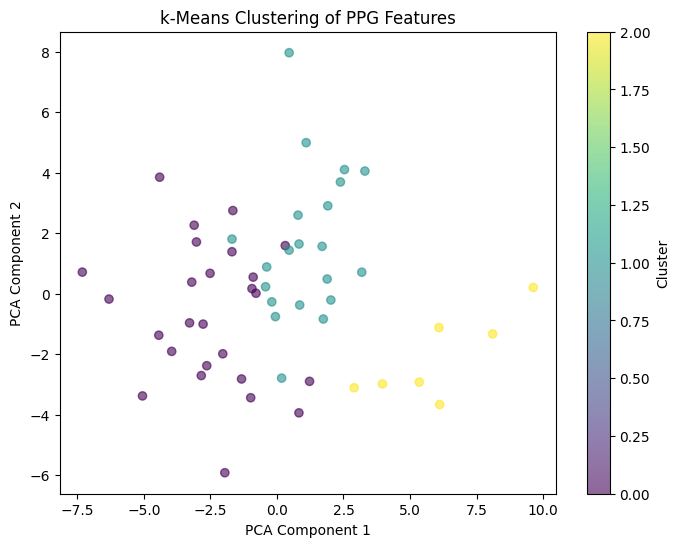

In [36]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce to 2 principal components for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=features['cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('k-Means Clustering of PPG Features')
plt.colorbar(label='Cluster')
plt.show()


In [37]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(features_scaled, features['cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.21085343788930083


# Statistical Tests

In [ ]:
from scipy import stats
t_test=stats.ttest_ind(features.iloc[0:len(features)//2],features.iloc[len(features)//2:len(features)])[1]

In [ ]:
t_test=pd.DataFrame(zip(features.columns.tolist(),t_test.tolist()),columns=['feature','p_value'])


In [ ]:
t_test[t_test['p_value']<0.05]

# Classification

Split features to train and test

stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided by parameter stratify

eg. a binary categorical classification problem 

y is the depenedent variable or target/label column within dataframe following values:

0 : 25% of data 
1 : 75% of data

then stratify = labels will make sure the random split has 
25% of 0s
75% of 1s

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(features,labels, test_size=0.3, shuffle=True,stratify=labels) 

# current ratio
# test data -30%
# train data - 70%

# stratify parameter makes a slit so that the proportion of values in the sample produced will be the same as the proportion 
# of values provided by parameter stratify
# eg. a binary categorical classification problem 
# y is the depenedent variable or target/label column within dataframe following values:
# 0 : 25% of data 
# 1 : 75% of data

# then stratify = labels will make sure the random split has 
# 25% of 0s
# 75% of 1s

# Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler , scale, MaxAbsScaler
scaling=StandardScaler()
X_train=scaling.fit_transform(X_train)
X_test= scaling.transform(X_test)

# Apply Classifier

* Support Vector Machine
* KNN
* Logistic Regression
* Logistic Regression CV



In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
clf=SVC()
clf.fit(X_train,y_train)

In [ ]:
clf.score(X_test, y_test)

Calculate Predicted values

In [ ]:
y_pred=clf.predict(X_test)

# Print classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

# Confusion Matrix

https://www.v7labs.com/blog/confusion-matrix-guide

how to interpret confusion matrix



        Expected
        
        TP FP
        FN TN
        
Predicted        


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test , y_pred))

# how to interpret confusion matrix

Logistic Regression with Cross Validation

Prevent overfitting and 

provide a more realistic estimate of the model's generalization performance - its ability to perform well on new, unseen data

https://www.geeksforgeeks.org/cross-validation-machine-learning/

In [ ]:
feature=scale(features)
clf=LogisticRegressionCV(max_iter=2000).fit(feature, labels)
clf.score(feature , labels)

# LogisticRegressionCV has cross-validation
# max_iter = 2000 for maximum number of iterations of the optimization algorithm

# use cross validation to evaluate performance on unseen data
# divide input into multiple subsets, using one of the folds as validation set
# other folds for training sets
# repeat this multiple times
# each time using a different fold from the validation set
# Finally, results from each validation step are averaged to produce a more realistic estimate of model's performance
# its ability to perform well on new, unseen data
# validation set is withheld from training & used to evaluate how the model performs on unseen data

# prevent overfitting

# training loss vs validation loss -> when training loss = validation loss stop training epoch in neural network

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVC() , feature, labels, cv=10).mean()

# Classifiers

In [ ]:
from sklearn.metrics import accuracy_score , log_loss

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC , LinearSVC , NuSVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score , accuracy_score

from sklearn.pipeline import Pipeline

classifiers = [
    
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()
]

In [ ]:
X,y=features,labels
accuracy=[]
accuracy_std = []

pipeline = Pipeline([('transformer' , StandardScaler()), ('estimator' , clf) ])

for clfs in classifiers:
    pipeline.set_params(estimator = clfs)
    name = clfs.__class__.__name__
    
    print('='*30)
    print(name)
    print('******  Results  ******')
    scores = cross_val_score(pipeline , X, y , cv=27) # cv determines the cross validation splitting strategy
    # default cv is 5 to use 5-fold cross validation
    
    print('Accuracy: {:.4%}'.format(np.array(scores).mean()))
    accuracy.append(np.array(scores).mean())
    accuracy_std.append(np.array(scores).std())
    
    

In [ ]:
import matplotlib.pyplot as plt
classifier = ['KNN', 'SVC', 'DT', 'RF', 'Ada' , 'GB', 'NB','LDA', 'QDA', 'LR']

y_pos =np.arange(len(classifier))
plt.bar(y_pos , np.array(accuracy))
ys=np.array(accuracy)
for index, value in enumerate(ys):
    plt.text(index-0.2,value-0.2, str(np.round(value,2)),rotation=90,color='white', fontsize=12)
    plt.xticks(y_pos , classifier , fontsize=11)
    plt.yticks(fontsize=11)
    plt.ylabel('Accuracy', fontsize=12)
    plt.xlabel('Classifiers', fontsize=12)
    plt.title('Cross Validation Accuracy', fontsize=12)
# plt.savefig('accuracy.svg' , dip=300)

Possible Classifiers:

* KNN  -  KNeighborsClassifier
* GB - GradientBoostingClassifier
* LDA - LinearDiscriminantAnalysis
* LR -  LogisticRegression


Try combining each of these with GSR data to give stress prediction and evaluate accuracy